In [1]:
import cv2
from matplotlib import pyplot as plt
import lane_detection
import lane_following

In [2]:
IP_ADDRESS = "192.168.1.102"

In [3]:
'''vcap = cv2.VideoCapture(f"rtsp://{IP_ADDRESS}:8554/rovcam")
img = None

MAX_RETRY = 100
count = 0
while count < MAX_RETRY:
    count += 1
    # Obtain the frame
    ret, frame = vcap.read()

    # Check frame was received successfully
    if ret:
        # got a frame, close the cap and return the frame
        print(" got a frame ")
        img = frame
        vcap.release()

vcap.release()'''
img = cv2.imread('frame_from_auv.jpg')

In [4]:
type(img)

numpy.ndarray

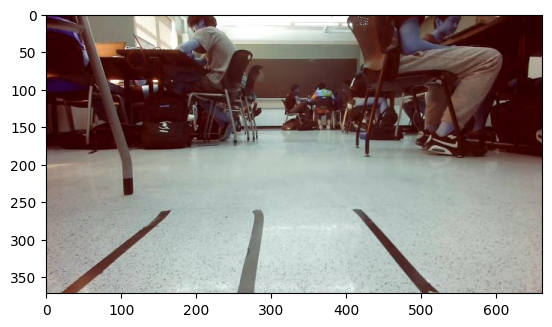

In [5]:
plt.imshow(img)

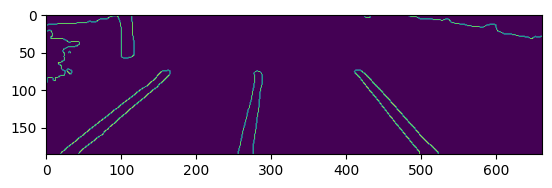

In [6]:
img0 = img.copy()
sliced_img = img0[ int(img0.shape[0] / 2) : img0.shape[0]]
frame = sliced_img.copy()
gray = cv2.cvtColor(sliced_img, cv2.COLOR_BGR2GRAY) # convert to grayscale
blurredimg = cv2.GaussianBlur(gray,(9,9),0)
ret,bw_image = cv2.threshold(blurredimg, 140, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(bw_image,50, 200, apertureSize=3) # detect edges
plt.imshow(edges)

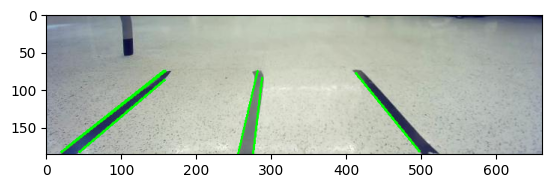

In [7]:
line_img = frame.copy()
linelist = lane_detection.detect_lines(line_img, edges,50,200, 3, 100, 10)
new_line_img = lane_detection.draw_lines(line_img,linelist)
plt.imshow(cv2.cvtColor(new_line_img,cv2.COLOR_BGR2RGB))

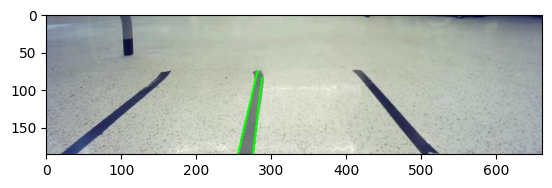

In [8]:
lane_img = frame.copy()
lanelist = lane_detection.detect_lanes(linelist)
new_lane_img = lane_detection.draw_lanes(lane_img,lanelist)
plt.imshow(cv2.cvtColor(new_lane_img,cv2.COLOR_BGR2RGB))

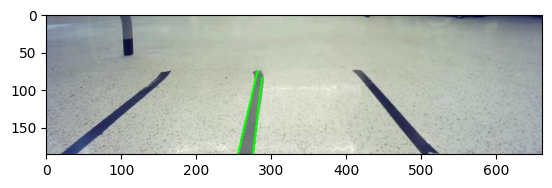

In [9]:
center_lane_img = frame.copy()
center_lane = lane_following.get_lane_center(lanelist)
new_center_lane_img = lane_detection.draw_lanes(center_lane_img,center_lane)
plt.imshow(cv2.cvtColor(new_center_lane_img,cv2.COLOR_BGR2RGB))


In [13]:
center_line_img = frame.copy()
center_line = lane_following.get_center_line(center_lane[0])
print(center_line.get_points())
(x1,y1,x2,y2) = center_line.get_points()
cv2.line(center_line_img, (x1,y1), (x2,y2), (0,255,0),2)
plt.imshow(cv2.cvtColor(center_line_img,cv2.COLOR_BGR2RGB))
# new_center_line_img = lane_detection.draw_lines(center_line_img,[center_line])
# plt.imshow(cv2.cvtColor(new_center_line_img,cv2.COLOR_BGR2RGB))

(298.85373537353735, 0, 266.88793879387936, 180)


error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'line'
> Overload resolution failed:
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
